In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode the class labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

# Network Architecture Design

For CIFAR-10, a basic feedforward neural network might not perform well, so we can use a convolutional neural network (CNN).
Example Architecture:

    Input Layer: Shape = (32, 32, 3) (for CIFAR-10 images)
    Conv Layer 1: 32 filters, kernel size (3,3), activation = ReLU
    Max Pooling Layer: Pool size (2,2)
    Conv Layer 2: 64 filters, kernel size (3,3), activation = ReLU
    Max Pooling Layer
    Flatten Layer
    Fully Connected Layer: 128 neurons, activation = ReLU
    Output Layer: 10 neurons, activation = softmax (for multi-class classification)

In [4]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

Justification:

- Conv Layers capture spatial hierarchies and patterns, which is crucial for image data.
- ReLU activation prevents the vanishing gradient problem, and it performs well in practice.
- Max Pooling helps reduce dimensionality, preserving important features.
- Fully Connected Layers act as the decision-making layer.
- Softmax in the output layer is used to output class probabilities.

# Loss Function and Optimizer

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model

In [7]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
782/782 [==============================] - 34s 43ms/step - loss: 1.5975 - accuracy: 0.4211 - val_loss: 1.2571 - val_accuracy: 0.5496
Epoch 2/50
782/782 [==============================] - 33s 42ms/step - loss: 1.2941 - accuracy: 0.5409 - val_loss: 1.1342 - val_accuracy: 0.6063
Epoch 3/50
782/782 [==============================] - 33s 43ms/step - loss: 1.1818 - accuracy: 0.5840 - val_loss: 1.0371 - val_accuracy: 0.6330
Epoch 4/50
782/782 [==============================] - 33s 42ms/step - loss: 1.1144 - accuracy: 0.6106 - val_loss: 1.0424 - val_accuracy: 0.6391
Epoch 5/50
782/782 [==============================] - 31s 40ms/step - loss: 1.0686 - accuracy: 0.6248 - val_loss: 0.9746 - val_accuracy: 0.6660
Epoch 6/50
782/782 [==============================] - 31s 40ms/step - loss: 1.0267 - accuracy: 0.6392 - val_loss: 0.9904 - val_accuracy: 0.6541
Epoch 7/50
782/782 [==============================] - 31s 39ms/step - loss: 0.9952 - accuracy: 0.6499 - val_loss: 0.9160 - val_accuracy:

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes))

conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

313/313 [==============================] - 1s 3ms/step - loss: 0.6378 - accuracy: 0.7931
Test accuracy: 0.7930999994277954
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1000
           1       0.87      0.93      0.90      1000
           2       0.75      0.67      0.71      1000
           3       0.69      0.55      0.61      1000
           4       0.79      0.76      0.77      1000
           5       0.76      0.63      0.69      1000
           6       0.77      0.91      0.83      1000
           7       0.79      0.87      0.82      1000
           8       0.88      0.85      0.87      1000
           9       0.80      0.92      0.85      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

[[847  23  33   5   8   2  10  10  28  34]
 [  8 925   0   1   

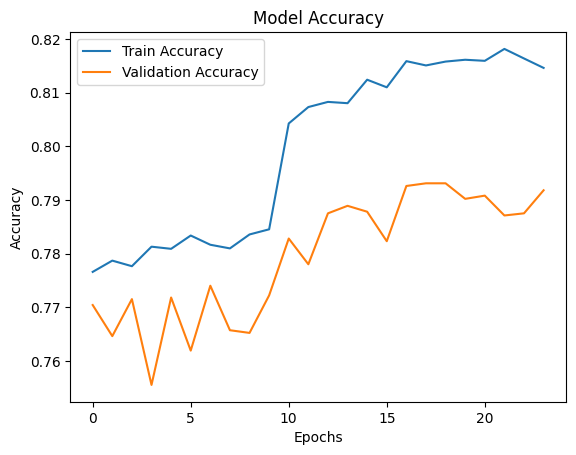

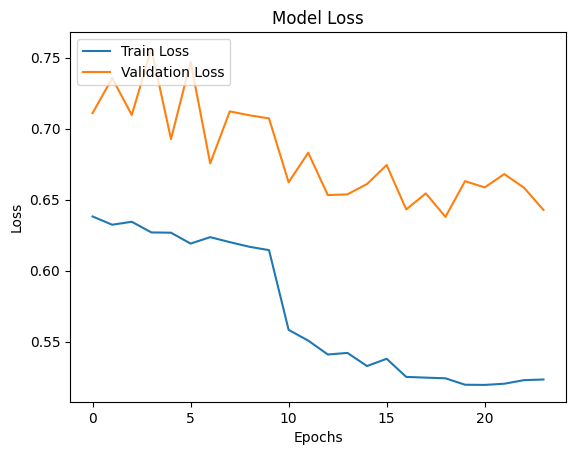

In [20]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Optimization Strategies

Early Stopping: Prevents overfitting by stopping training when validation loss
stops improving.

- monitor='val_loss': It tracks the validation loss during training.
- patience=5: The model is allowed to train for 5 more epochs after the validation loss has stopped improving. If after 5 epochs there is no improvement, training is stopped.
- restore_best_weights=True: After stopping early, this ensures that the model - restores the weights from the epoch that had the best validation loss.

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Learning Rate Scheduling: Reduces the learning rate when performance plateaus.

In [13]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

In [14]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
782/782 [==============================] - 32s 41ms/step - loss: 0.6381 - accuracy: 0.7766 - val_loss: 0.7109 - val_accuracy: 0.7704 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 32s 40ms/step - loss: 0.6323 - accuracy: 0.7787 - val_loss: 0.7354 - val_accuracy: 0.7646 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - 31s 40ms/step - loss: 0.6343 - accuracy: 0.7776 - val_loss: 0.7096 - val_accuracy: 0.7715 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - 32s 40ms/step - loss: 0.6268 - accuracy: 0.7813 - val_loss: 0.7560 - val_accuracy: 0.7555 - lr: 0.0010
Epoch 5/50
782/782 [==============================] - 31s 40ms/step - loss: 0.6266 - accuracy: 0.7809 - val_loss: 0.6925 - val_accuracy: 0.7718 - lr: 0.0010
Epoch 6/50
782/782 [==============================] - 31s 40ms/step - loss: 0.6190 - accuracy: 0.7834 - val_loss: 0.7470 - val_accuracy: 0.7619 - lr: 0.0010
Epoch 7/50
782/782 [==============================] - 32s 

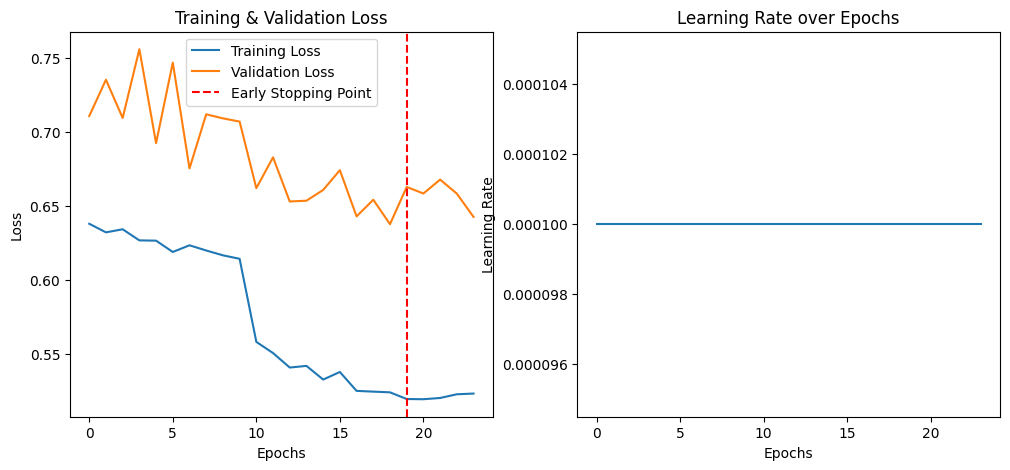

In [23]:
def get_lr_schedule(history):
    lrs = []
    optimizer = model.optimizer
    for epoch in range(len(history.history['loss'])):
        lr = optimizer.learning_rate
        lrs.append(float(lr))
    return lrs

# Plot the training and validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=len(history.history['val_loss']) - early_stopping.patience, color='r', linestyle='--', label='Early Stopping Point')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Learning rate plot
lrs = get_lr_schedule(history)
plt.subplot(1, 2, 2)
plt.plot(lrs)
plt.title('Learning Rate over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.show()

# Report

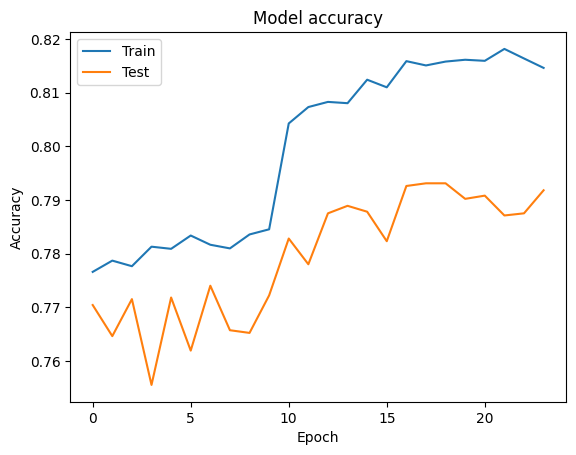

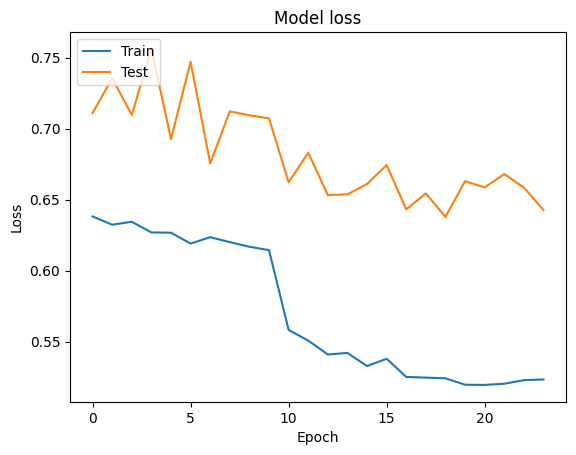

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()